# PreRequisites

- Installing Libraries
    - torch
    - torchvision
    - numpy
    - matplotlib
    - pandas
 
Run this in the terminal
> pip3 install torch torchvision numpy matplotlib pandas


# 1. Import libraries

In [3]:
# import libraries
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


# 2. Loading and preprocessing the data from the pytorch dataset

In [4]:
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


13.2%

100.0%


Extracting /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw


100.0%
45.7%


Extracting /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw



100.0%
100.0%


Extracting /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw

Extracting /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /home/adamnguyen/.pytorch/MNIST_data/MNIST/raw



# 3. Create the neural network

In [5]:
import torch.nn as nn
import torch.nn.functional as F

# Define the network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(28 * 28, 128)  # Flatten the image pixels into a 784 length vector
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # The output is 10 classes for digits 0-9

    def forward(self, x):
        # Flatten image input
        x = x.view(-1, 28 * 28)
        # Add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # Output layer with softmax activation
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

# Instantiate the network
model = Net()
print(model)


Net(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


# 4. Define the loss function and optimizer

In [7]:
import torch.optim as optim

# Define the loss
criterion = nn.CrossEntropyLoss()

# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)


# 5. Train the network

In [8]:
# Number of epochs to train the model
epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        # This is where the model learns by backpropagating
        loss.backward()
        
        # And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")


/home/adamnguyen/.local/lib/python3.8/site-packages/torch/autograd/__init__.py:251: UserWarning: CUDA initialization: The NVIDIA driver on your system is too old (found version 11040). Please update your GPU driver by downloading and installing a new version from the URL: http://www.nvidia.com/Download/index.aspx Alternatively, go to: https://pytorch.org to install a PyTorch version that has been compiled with your version of the CUDA driver. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Training loss: 0.6479759870180443
Training loss: 0.28617293154125784
Training loss: 0.22006454683347806
Training loss: 0.17654243513528725
Training loss: 0.14631765474007327
Training loss: 0.12496699989914323
Training loss: 0.10848396946427855
Training loss: 0.09654062955346364
Training loss: 0.0869546411966067
Training loss: 0.07776524904749986
Training loss: 0.07163634028599493
Training loss: 0.0656183965256942
Training loss: 0.060342582480322676
Training loss: 0.054633955359518496
Training loss: 0.05149822603009625


# 6. Evaluate the model

In [9]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        images = images.view(images.shape[0], -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 97 %


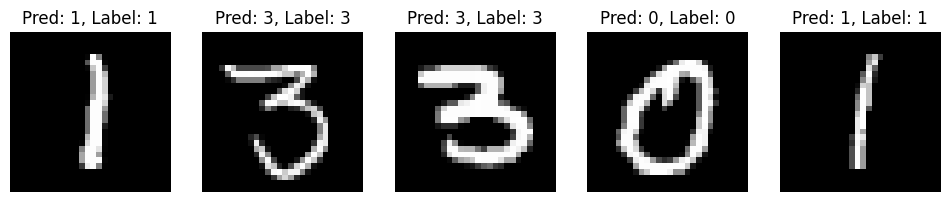

In [11]:
import matplotlib.pyplot as plt

# Set the model to evaluation mode
model.eval()

# Get some random testing images
dataiter = iter(testloader)
images, labels = next(dataiter)  # Use next() instead of dataiter.next()

# Get predictions
with torch.no_grad():
    images_flattened = images.view(images.shape[0], -1)
    outputs = model(images_flattened)

# Convert outputs to probabilities
probabilities = torch.exp(outputs)

# Get the predicted class from the probabilities
_, predicted = torch.max(probabilities, 1)

# Plot the results
fig, axes = plt.subplots(1, 5, figsize=(12, 4))
for ax, image, pred, label in zip(axes, images, predicted, labels):
    ax.imshow(image.numpy().squeeze(), cmap='gray')
    ax.title.set_text(f'Pred: {pred.item()}, Label: {label.item()}')
    ax.axis('off')
plt.show()
